In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime

In [66]:
df_info = pd.read_csv('clean_data.csv')
drop_list = df_info[df_info['Price(Triệu/tháng)']>50].index
df_info.drop(index=drop_list,inplace = True)

Chuyển sang dạng datetime cho cột Date

In [67]:
df_info["Date"] = df_info["Date"].str.replace('\r','')
df_info["Date"] = df_info["Date"].str.replace(' ','')
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y",errors = 'raise')

## Câu hỏi: Chỉ số tăng trưởng giá thuê của các quận
Có một người đang có ý định đầu tư vào lĩnh vực cho thuê phòng trọ ĐƠN cho sinh viên. Sau khi tìm hiểu, người đó nhận ra rằng 3 khu vực có đông sinh viên nhất là Quận Thủ Đức, Quận Bình Thạnh và Quận 7. Để quyết định xem là nên đầu tư vào khu vực nào thì sẽ tốt nhất về lâu dài ( tức là giá thuê và lợi ích có sự tăng trưởng tốt nhất ), người đó muốn nhờ bạn chỉ ra xu hướng giá nhà thuê của các khu vực này theo các năm 2018, 2019, 2020, 2021, 2022. Nên nhớ là sinh viên chỉ có thể chi trả dưới 10 triệu/tháng, hãy tính chỉ số tăng trưởng cho từng quận qua các năm. Công thức của chỉ số này là 0.2*diện tích + 0.6*giá + 0.2*chỉ số yêu thích (Q1: 1.5 QBT: 1 Q7: 0.5) (mức độ yêu thích của người này với các quận)

### Đầu tiên, lọc ra những bài đăng của 3 quận này

In [68]:
df_q1_bt_q7 = df_info[(df_info['District'] == 'Quận 1') | (df_info['District'] == 'Quận 7') | (df_info['District'] == 'Bình Thạnh')]
df_q1_bt_q7

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,2018-10-17
11,835953,KTX cho thuê tại 150 Nguyễn thị thập giá từ 450 k,0.45,25.0,Quận 7,Hồ Chí Minh,2018-09-29
14,836410,☆☆BẠN CÓ MUỐN Ở TRONG NHÀ NÀY KHÔNG? ☆NHÀ MẶT ...,6.00,20.0,Bình Thạnh,Hồ Chí Minh,2018-09-29
15,836668,Cho thuê KTX máy lạnh 450k/tháng ở xô viết ngh...,0.45,40.0,Bình Thạnh,Hồ Chí Minh,2018-09-29
20,840835,"Phòng ở ghép - ký túc xá cho sv, người đi làm ...",1.10,35.0,Bình Thạnh,Hồ Chí Minh,2018-10-12
...,...,...,...,...,...,...,...
1163,2063757,"Cho Thuê Phòng Đường Mai Văn Vĩnh, Quận 7,...",4.00,20.0,Quận 7,Hồ Chí Minh,2022-10-17
1169,2094225,Cho thuê phòng trọ có gác giá rẻ nhưng đầy đủ ...,3.70,15.0,Quận 7,Hồ Chí Minh,2022-10-24
1174,2109043,"Căn hộ 2T bancony ngay chợ Bà Chiểu, sát hàng ...",6.50,25.0,Bình Thạnh,Hồ Chí Minh,2022-11-11
1175,2109867,Căn hộ đẹp Tràn Ngập Tiện Nghi ngay trung tâm Q.1,6.00,30.0,Quận 1,Hồ Chí Minh,2022-11-12


### Ta sẽ loại đi những bài đăng ở ghép hay ở KTX (vì những bài đăng này có giá rẻ nhưng diện tích lại lớn, ảnh hưởng đến kết quả)

In [69]:
drop_list = []
for i in df_q1_bt_q7.index:
    title = df_q1_bt_q7.loc[i]['Title']
    if 'KTX' in title or 'ktx' in title or 'Kí túc xá' in title or 'kí túc xá' in title or 'ghép' in title or 'Ghép' in title:
        drop_list.append(i)

In [70]:
df_q1_bt_q7.drop(index = drop_list,inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11792\2620826261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1_bt_q7.drop(index = drop_list,inplace = True)


Lọc ra những phòng có giá dưới 10 triệu

In [71]:
df_q1_bt_q7 = df_q1_bt_q7[df_q1_bt_q7['Price(Triệu/tháng)'] < 10]

#### Ta thêm cột Year vào dataframe để phân loại theo năm

In [72]:
df_q1_bt_q7['Year'] = df_q1_bt_q7['Date'].array.year

C:\Users\HP\AppData\Local\Temp\ipykernel_11792\151600109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1_bt_q7['Year'] = df_q1_bt_q7['Date'].array.year


Để xem những phân khúc giá nhà có số lượng phân bố như thế nào, ta sẽ vẽ biểu đồ

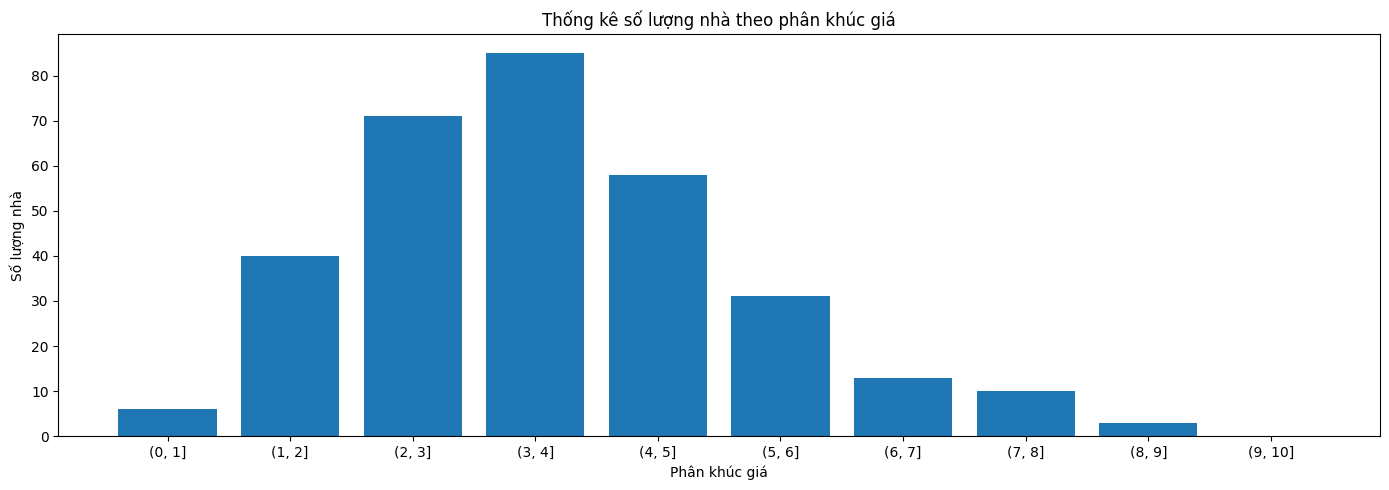

In [73]:
price_list_range = np.arange(0,11,1)

range_price_10 = pd.cut(df_q1_bt_q7["Price(Triệu/tháng)"],bins = price_list_range)

count_price_10 = range_price_10.value_counts().sort_index()
count_price_10 = count_price_10.reset_index()
count_price_10.columns = ["Range","So luong"]
count_price_10["Range"] = count_price_10["Range"].astype(str)

plt.subplots(figsize = (14,5))
plt.bar(count_price_10["Range"],count_price_10["So luong"])

plt.xlabel('Phân khúc giá')
plt.ylabel('Số lượng nhà')
plt.title('Thống kê số lượng nhà theo phân khúc giá')
plt.tight_layout()
plt.show()

Ta thấy đồ thị có dạng phân phối chuẩn (lệch phải), tập trung nhiều ở mức giá 3-4 triệu đồng. Có một số điểm như từ 0-1 triệu hay 8-9 triệu có số lượng tương đối, nếu lấy trung bình sẽ ảnh hưởng đến dữ liệu

Ta sẽ lấy giá trị trung vị để tránh bị ảnh hưởng

In [74]:
df_price = df_q1_bt_q7.groupby(['Year','District'])['Price(Triệu/tháng)'].agg(['median'])
df_price.rename(columns = {'median': 'medianprice'},inplace = True)
df_price

medianprice
Year District               
2018 Bình Thạnh        3.700
     Quận 1            5.950
     Quận 7            3.500
2019 Bình Thạnh        3.200
     Quận 1            3.500
     Quận 7            3.300
2020 Bình Thạnh        3.025
     Quận 1            3.500
     Quận 7            3.000
2021 Bình Thạnh        3.500
     Quận 1            5.000
     Quận 7            4.000
2022 Bình Thạnh        4.500
     Quận 1            5.000
     Quận 7            3.700

Làm tương tự với diện tích

In [75]:
sorted(df_q1_bt_q7["Square(m²)"].unique())

[1.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 24.0,
 25.0,
 35.0,
 nan,
 19.0,
 22.0,
 23.0,
 26.0,
 27.0,
 28.0,
 30.0,
 32.0,
 34.0,
 36.0,
 37.0,
 38.0,
 40.0,
 45.0,
 50.0,
 80.0,
 90.0,
 118.0]

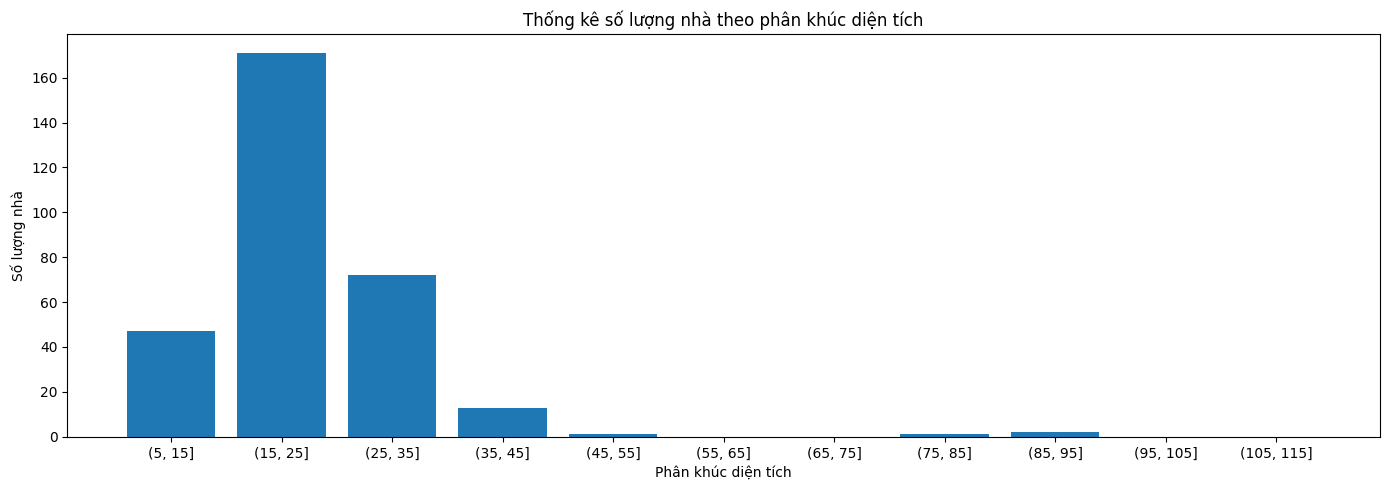

In [76]:
price_list_range = np.arange(5,118,10)

range_price_10 = pd.cut(df_q1_bt_q7["Square(m²)"],bins = price_list_range)

count_price_10 = range_price_10.value_counts().sort_index()
count_price_10 = count_price_10.reset_index()
count_price_10.columns = ["Range","So luong"]
count_price_10["Range"] = count_price_10["Range"].astype(str)

plt.subplots(figsize = (14,5))
plt.bar(count_price_10["Range"],count_price_10["So luong"])

plt.xlabel('Phân khúc diện tích')
plt.ylabel('Số lượng nhà')
plt.title('Thống kê số lượng nhà theo phân khúc diện tích')
plt.tight_layout()
plt.show()

In [77]:
df_square = df_q1_bt_q7.groupby(['Year','District'])['Square(m²)'].agg(['median'])
df_square['median'] = df_square['median']/10
df_square.rename(columns = {'median': 'mediansquare'},inplace = True)
df_square

mediansquare
Year District                
2018 Bình Thạnh          2.10
     Quận 1              2.50
     Quận 7              2.50
2019 Bình Thạnh          2.45
     Quận 1              2.30
     Quận 7              2.00
2020 Bình Thạnh          2.00
     Quận 1              2.00
     Quận 7              2.50
2021 Bình Thạnh          2.00
     Quận 1              2.00
     Quận 7              2.50
2022 Bình Thạnh          2.50
     Quận 1              2.25
     Quận 7              2.00

Để tiện cho việc tính toán, ta sẽ thêm cột median square vào df_price

In [78]:
df_price['mediansquare'] = df_square['mediansquare']

In [79]:
df_price['fav rate'] = [1,1.5,0.5] * 5
df_price

medianprice  mediansquare  fav rate
Year District                                       
2018 Bình Thạnh        3.700          2.10       1.0
     Quận 1            5.950          2.50       1.5
     Quận 7            3.500          2.50       0.5
2019 Bình Thạnh        3.200          2.45       1.0
     Quận 1            3.500          2.30       1.5
     Quận 7            3.300          2.00       0.5
2020 Bình Thạnh        3.025          2.00       1.0
     Quận 1            3.500          2.00       1.5
     Quận 7            3.000          2.50       0.5
2021 Bình Thạnh        3.500          2.00       1.0
     Quận 1            5.000          2.00       1.5
     Quận 7            4.000          2.50       0.5
2022 Bình Thạnh        4.500          2.50       1.0
     Quận 1            5.000          2.25       1.5
     Quận 7            3.700          2.00       0.5

Sau đó, ta tính cột chỉ số tăng trưởng

In [80]:
df_price['growth rate'] = df_price['medianprice']*0.6 + df_price['mediansquare']*0.2 + df_price['fav rate'] 

Ta sẽ vẽ biểu đồ đường để thể hiện chỉ số tăng trưởng của từng quận qua các năm

In [81]:
bt = df_price.query('District == "Bình Thạnh"').reset_index()
td = df_price.query('District == "Quận 7"').reset_index()
q1 = df_price.query('District == "Quận 1"').reset_index()

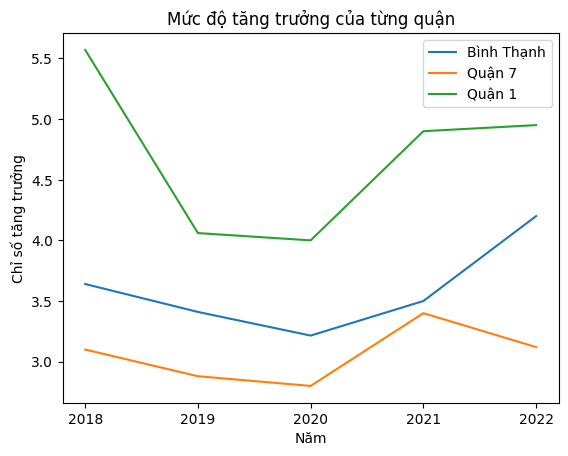

In [82]:
bt['Year'] = bt['Year'].astype(str)
td['Year'] = td['Year'].astype(str)
q1['Year'] = q1['Year'].astype(str)
plt.plot(bt['Year'],bt['growth rate'],label = 'Bình Thạnh')
plt.plot(td['Year'],td['growth rate'],label = 'Quận 7')
plt.plot(q1['Year'],q1['growth rate'],label = 'Quận 1')
plt.xlabel('Năm')
plt.ylabel('Chỉ số tăng trưởng')
plt.title('Mức độ tăng trưởng của từng quận')
plt.legend()
plt.show()

#### Ta thấy vào năm 2018, Quận 1 có chỉ số cao hơn hẳn 2 quận còn lại nhưng qua năm lại giảm rất mạnh ( có thể là do ourlier ), trong khi 2 quận kia tăng nhẹ. Năm 2020 do dịch nên cả 3 quận đều giảm. Qua năm 2021 thì Quận 1 và Quận 7 tăng khá mạnh, còn Bình Thạnh tăng nhẹ. Năm 2022 Quận 7 đang có chỉ số xuống, quận 1 thì tăng nhẹ, còn Bình Thạnh lại có sự tăng đột biến

#### Sự biến động của quận 1 khá lớn, nếu xét cả 5 năm thì Quận 1 thậm chí còn kém hơn so với lúc đầu (năm 2018), như vậy sẽ rất bất ổn nếu đầu tư vào đây. 

#### Quận 7 cũng có sự tăng trưởng nhưng giá trị của chỉ số lại khá thấp, thậm chí năm 2022 chỉ số này còn có xu hướng đi xuống nên có vẻ cũng không nhiều lợi ích lắm nếu đầu tư vào đây 

#### Lời khuyên là nên đầu tư vào Bình Thạnh. Ta quan sát thấy rằng tuy chỉ số có giảm ở năm 2018 - 2020 nhưng sau dịch, Quận này lại có sự tăng trưởng ổn định, thậm chí tăng rất mạnh ở năm 2022. Giá trị của chỉ số tăng trưởng cũng vô cùng tốt và nhiều khả quan.



## Câu hỏi: Mối liên hệ giữa số bài đăng và giá phòng
### Liệu có phải càng nhiều bài đăng ( số lượng phòng trống nhiều -> mức độ cung lớn) thì giá phòng càng rẻ hay không?. Hãy liệt kê số lượng bài đăng theo từng tháng và tính giá trung bình để trả lời câu hỏi trên

Vì xét theo tháng nên ta sẽ thêm cột tháng vào để tiện xử lý

In [83]:
df_info['Month'] = df_info['Date'].array.month
df_info['Year'] = df_info['Date'].array.year
df_info

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date,Month,Year
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,2020-06-20,6,2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,2018-11-21,11,2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,2018-10-17,10,2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,2018-10-03,10,2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,2018-10-05,10,2018
...,...,...,...,...,...,...,...,...,...
1180,2112161,"Nhà mới xây, Miễn phí cầu thang máy, điều hòa,...",2.80,25.0,Bình Tân,Hồ Chí Minh,2022-11-15,11,2022
1181,2113773,Cho thuê phòng trọ tại phường 12 - gò vấp,5.50,20.0,Gò Vấp,Hồ Chí Minh,2022-11-17,11,2022
1182,2118730,Cho thuê giường kén CAPSULE CAO CẤP SMART _ Tr...,2.80,30.0,Quận 3,Hồ Chí Minh,2022-11-24,11,2022
1183,2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5.00,16.0,Quận 10,Hồ Chí Minh,2022-11-25,11,2022


Ta tạo 1 dataframe gồm 2 cột là số lượng nhà đăng trong tháng và giá trung bình, index là các tháng trong năm

In [84]:
df_num_price = pd.DataFrame([],index = sorted(df_info['Month'].unique()))

Thống kê số lượng phòng đăng lên theo tháng

In [85]:
df_num_price['Num'] = df_info['Month'].value_counts().sort_index()
df_num_price['Num']

1      61
2      67
3     123
4      67
5     105
6     101
7      86
8      51
9      58
10    290
11     87
12     80
Name: Num, dtype: int64

Sau đó, ta tính giá trung bình của tiền thuê nhà theo tháng

In [98]:
df_num_price['AvePrice'] = df_info.groupby(['Month'])['Price(Triệu/tháng)'].mean()

In [99]:
df_num_price

,Num,AvePrice
1,61,3.125410
2,67,3.237313
3,123,3.152846
4,67,3.258209
5,105,3.785524
6,101,3.000000
7,86,4.036058
8,51,4.223529
9,58,3.561439
10,290,4.499552


Ta sẽ vẽ biểu đồ thể hiện mối liên hệ giữa số lượng bài đăng trong một tháng và giá trung bình của tháng đó

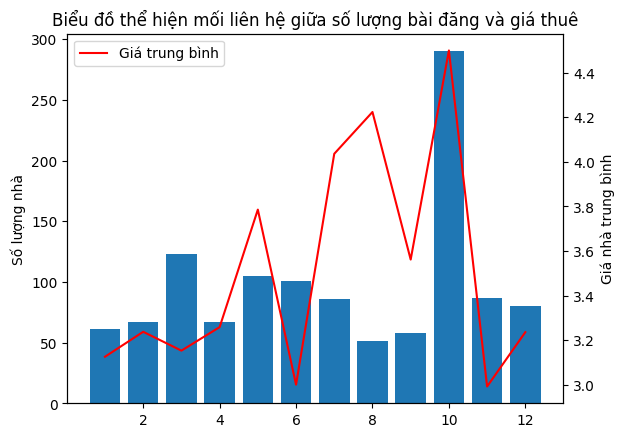

In [100]:
fig,ax = plt.subplots()
ax.bar(df_num_price.index,df_num_price['Num'])

ax2=ax.twinx()
ax2.plot(df_num_price.index,df_num_price['AvePrice'],color="red",label = 'Giá trung bình')

plt.xlabel('Tháng')
ax.set_ylabel('Số lượng nhà')
ax2.set_ylabel('Giá nhà trung bình')
plt.title('Biểu đồ thể hiện mối liên hệ giữa số lượng bài đăng và giá thuê')
plt.legend()
plt.show()

#### Ta thấy rằng ở tháng 10 có số bài đăng nhiều nhất cũng như mức giá cao nhất. Điều này cũng khá dễ hiểu vì đây là thời điểm nhập học nên nhu cầu ở trọ khá cao, lợi dụng điều đó nên giá cả cũng tăng theo. Còn ở những thời điểm khác thì giá nhà và số lượng bài đăng không theo quy luật nào hết. Một số tháng có giá trung bình thấp như tháng 11 (nhu cầu thuê đã ít đi nhiều) hay tháng 6 ( thời điểm trả phòng nên phải hạ giá để lôi kéo người thuê).

## Liệu có phải vào lúc nào số lượng bài đăng của các tháng cũng đều như trên? Ta sẽ xem qua từng năm thì các tháng sẽ thay đổi như thế nào

In [104]:
df_year_month = pd.DataFrame([],index = [2018,2019,2020,2021,2022])

for i in sorted(df_info['Month'].unique()):
    month_count = df_info[df_info['Month'] == i]
    month_count = month_count['Year'].value_counts()
    df_year_month[i] = month_count
df_year_month

,1,2,3,4,5,6,7,8,9,10,11,12
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,205,16,22.0
2019,17.0,12.0,42.0,18.0,23.0,25.0,20.0,10.0,21,40,16,17.0
2020,14.0,31.0,15.0,13.0,46.0,42.0,48.0,29.0,16,27,21,26.0
2021,23.0,11.0,41.0,21.0,34.0,25.0,5.0,1.0,3,11,19,15.0
2022,7.0,13.0,25.0,15.0,2.0,9.0,13.0,11.0,3,7,15,NaN


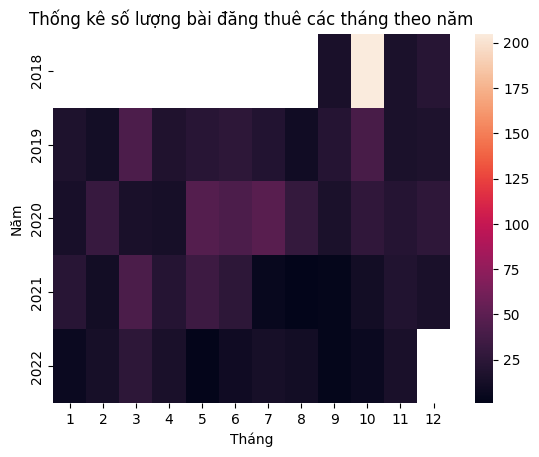

In [105]:
sns.heatmap(df_year_month)
plt.xlabel('Tháng')
plt.ylabel('Năm')
plt.title('Thống kê số lượng bài đăng thuê các tháng theo năm')
plt.show()

#### Vào năm 2018, ta thấy số lượng bài đăng vào tháng 10 là chủ yếu, từ tháng 1 - > 9 thì không có dữ liệu, điều này cũng có thể lý giải tại sao biểu đồ số lượng bài theo tháng ở trên 1 -> 9 khá ít còn thấng 10 lại nhiều. Điều bất ngờ là ở các năm sau thì tháng 10 không phải là tháng đăng bài nhiều nhất mà tầm tháng 2,3 (sau Tết). Có thể học kì mới nên sinh viên trả phòng nhiều + nhu cầu tìm kiếm phòng cao (khác với tháng 5,6 khi sinh viên trả phòng nhưng về quê)